In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

19           Estádio do Maracanã
148                     Camp Nou
98                Estadio Azteca
29               Wembley Stadium
186                    Rose Bowl
153    Estadio Santiago Bernabéu
190           Estadio Centenario
113               Lusail Stadium
Name: stadium_name, dtype: object 19     200
148    121
98     115
29      99
186     94
153     90
190     90
113     89
Name: stadium_capacity, dtype: int64
0 200
1 121
2 115
3 99
4 94
5 90
6 90
7 89


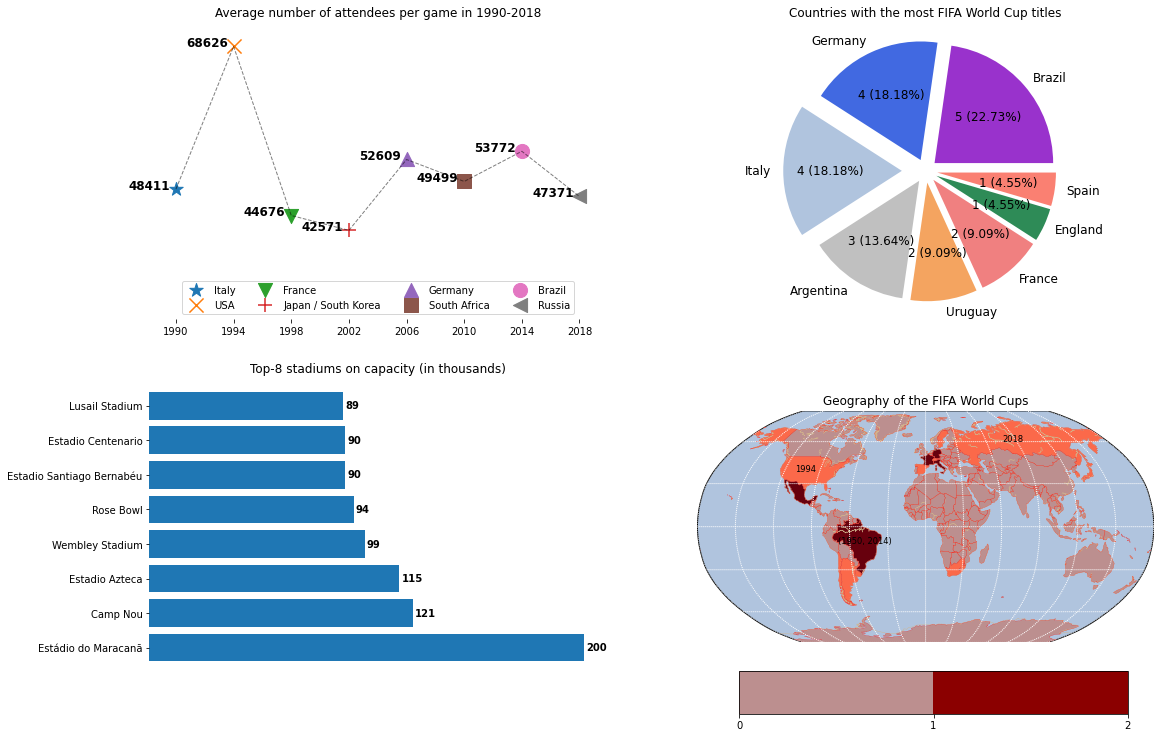

In [2]:
#plt.xkcd() # to make dashboard in xkcd sketch-style

# Four axes, returned as a 2d-array
fig, ax = plt.subplots(2,2, figsize=(18, 12))

## Line plot with colored markers "Number of attendees" ##
time = [1990, 1994, 1998, 2002, 2006,
        2010, 2014, 2018]
numbers = [48411, 68626, 44676, 42571,
           52609, 49499, 53772, 47371]
mydata = ax[0,0].plot(time, numbers, color='black',
                      linewidth=1, alpha=0.5, linestyle = '--')
markers = ['*', 'x', 'v', '+', '^', 's', 'o', '<']
labels = ['Italy', 'USA', 'France',
          'Japan / South Korea', 'Germany', 'South Africa', 'Brazil', 'Russia']

# get rid of the frame
for spine in ax[0,0].spines.values():
    spine.set_visible(False)

# remove y-label ticks & state the limits
ax[0,0].set_yticks([])
ax[0,0].set_ylim(30000, 72000)
ax[0,0].set_xticks(np.arange(1990, 2022, 4))

# make labels for each point - trick with bars with none colors
for bar_i in ax[0,0].bar(time, numbers, color ='none'):
    ax[0,0].text(x=bar_i.get_x(), y=bar_i.get_height(),
             s=f"{bar_i.get_height()}",
             ha='right',
             color='black', fontweight='bold', fontsize=12)

# create scatters above the line plot 
for i in range(len(time)):
    ax[0,0].scatter(time[i], numbers[i],
                    label=labels[i], marker=markers[i], s=200)

ax[0,0].set_title('Average number of attendees per game in 1990-2018')
ax[0,0].legend(loc='lower center', shadow=False, ncol=4)

## Pie chart "Coutries with the most FIFA World Cup titles" ##
label_list = ('Brazil','Germany','Italy','Argentina',
              'Uruguay','France','England','Spain')
freq = [5, 4, 4, 3, 2, 2, 1, 1]
colors = ['darkorchid', 'royalblue', 'lightsteelblue', 'silver',
          'sandybrown', 'lightcoral', 'seagreen', 'salmon']
explode = (0.1, 0.1, 0.2, 0.1, 0.1, 0.1, 0.1, 0.1)
ax[0,1].pie(freq, explode=explode, labels=label_list, colors=colors,
            autopct= lambda p : '{:,.0f} ({:.2f}%)'.format(p * sum(freq)/100, p),
            textprops={'fontsize': 12}) 
ax[0,1].set_title('Countries with the most FIFA World Cup titles')

## Bar chart horizontal "Top-8 stadiums on capacity" ##
cols = ['stadium_name', 'stadium_capacity']
data = pd.read_csv('stadiums.csv', encoding='utf-8-sig', usecols=cols)
data_2 = data.sort_values(by='stadium_capacity', ascending=False)
labels = data_2.stadium_name.head(8)
capacity = data_2.stadium_capacity.head(8)//1000
print(labels, capacity)
ax[1,0].barh(np.arange(len(capacity)), capacity)

# make labels for each bar
for count, cap_data in enumerate(capacity):
    print(count, cap_data)
    ax[1,0].text(x=cap_data+1, y=count, s=f"{cap_data}",
                 color='black', va='center', fontweight='bold')
ax[1,0].set_title('Top-8 stadiums on capacity (in thousands)')
ax[1,0].set_yticks(np.arange(len(capacity)))
ax[1,0].set_yticklabels(labels, fontsize = 10)

# get rid of the frame
for spine in ax[1,0].spines.values():
    spine.set_visible(False)

# remove x-label ticks
ax[1,0].set_xticks([])

## Map with labels ##
ax[1,1].set_title('Geography of the FIFA World Cups')
map = Basemap(projection='robin', llcrnrlat=-80,
              urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180,
              lon_0 = 0, lat_0 = 0)

# draw coastlines, country boundaries, fill continents
map.drawmapboundary(fill_color='lightsteelblue')
map.drawcoastlines(color='tan', linewidth=0.4)
map.drawcountries(color='tan', linewidth=0.4)

# draw lat/lon grid lines every 30 degrees
map.drawmeridians(np.arange(-180, 180, 30), color='white')
map.drawparallels(np.arange(-90, 90, 30), color='white')

shapefile = 'ne_110m_admin_0_countries'
cols = ['team_name', 'team_code', 'count']

df = pd.read_csv('data_football.csv', usecols=cols)
df.set_index('team_code', inplace=True)
df = df.dropna()
#print(df)

cm = plt.get_cmap('Reds')
scheme = [cm(i/df['count'].nunique()) for i in range(df['count'].nunique()+1)]

map.readshapefile(shapefile, 'units', color='red', linewidth=.2)
for info, shape in zip(map.units_info, map.units):
    iso3 = info['ADM0_A3']
    if iso3 not in df.index:
        color = 'rosybrown'
    else:
        color = scheme[int(df.loc[iso3]['count'])]
    patches = [Polygon(np.array(shape), True)]
    pc = PatchCollection(patches)
    pc.set_facecolor(color)
    ax[1,1].add_collection(pc)

cb = matplotlib.colorbar.ColorbarBase(ax=fig.add_axes([0.58, 0.08, 0.3, 0.05]),
                                      cmap=matplotlib.colors.ListedColormap(['rosybrown', 'tomato', 'darkred']),
                                      boundaries=range(3), orientation='horizontal')

# lat/lon coordinates
lats = [39.91, -10, 62]
lngs = [-102.98, -48, 88]
geography = [(1994), (1950,2014), (2018)]
x,y = map(lngs,lats)

# plot labels 
for geo, xpt, ypt in zip(geography, x, y):
    label_txt = geo #round to 0 dp and display as integer
    ax[1,1].text(xpt, ypt, label_txt, color = 'black', size='small', horizontalalignment='center',
                 verticalalignment='center')

#plt.savefig('cover_figure_draw.jpeg', dpi=1200)            
plt.show()